# **Task 5**
* Name: DEVANSHU GUPTA
* Reg.No.: 21BCE0597
* Email id: devanshu.gupta2021@vitstudent.ac.in
* Branch: CSE
* Campus: VIT Vellore
* Learning Track: AI & ML in collab. with Google (Applied Data Science)
* Batch: Evening (6pm - 8pm)
* Github Link: https://github.com/devanshu0602/Applied-Data-Science/tree/main/Task%205

<br>

---

<br>

***Title***: Market Basket Magic: Extracting Insights for Retail Success

***Description***: Customer segmentation is a crucial aspect of retail and marketing strategy. Mall Customer Segmentation is a common data analysis project that involves categorizing mall customers into distinct groups or segments based on various characteristics and behaviors. This segmentation is valuable for tailoring marketing efforts, optimizing store layouts, and enhancing customer experiences.


# Kaggle connection

In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 5.65MB/s]


In [5]:
!unzip '/content/customer-segmentation-tutorial-in-python.zip'

Archive:  /content/customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


# Load the dataset

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Visualization

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

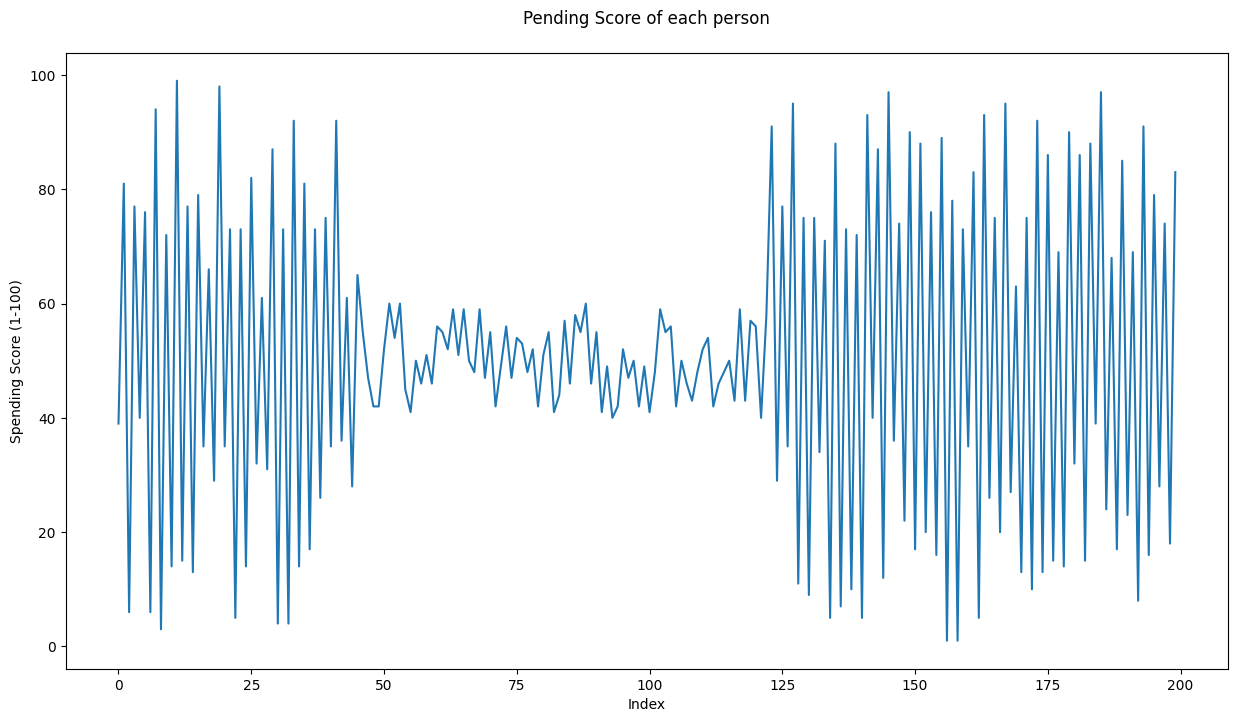

In [9]:
plt.figure(figsize = [15, 8])
sns.lineplot(df['Spending Score (1-100)'])
plt.title('Pending Score of each person\n')
plt.xlabel('Index')
plt.show()

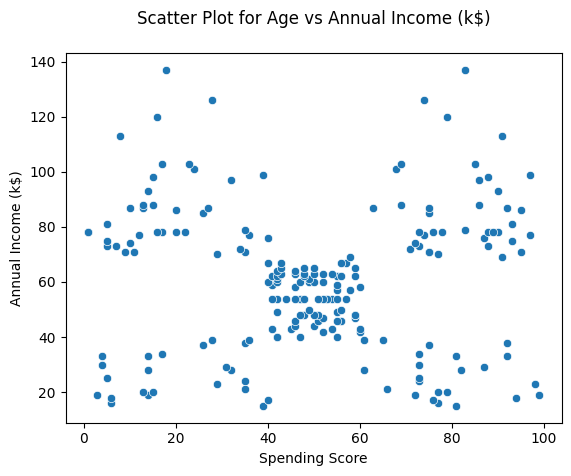

In [10]:
sns.scatterplot(
    data = df,
    x = 'Spending Score (1-100)',
    y = 'Annual Income (k$)'
)
plt.title('Scatter Plot for Age vs Annual Income (k$)\n')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income (k$)')
plt.show()

# Data Preprocessing

In [11]:
# Dropping the CustomerID column

df.drop(columns = ['CustomerID'], axis = 1, inplace = True)

In [12]:
# Encoding categorical features

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Model building

## Kmeans Clustering

In [14]:
from sklearn.cluster import KMeans

In [15]:
error = []

for i in range(1, 21):
    kmeans = KMeans(
        n_clusters = i,
        init = 'k-means++',
        random_state = 42,
        n_init = 10
    )

    kmeans.fit(df)

    error.append(kmeans.inertia_)

error

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75427.71182424155,
 58348.641363315044,
 51575.2779310779,
 44359.634641148325,
 40942.51117006117,
 37515.84125504126,
 34221.804728234725,
 32479.79468550712,
 29472.951755651753,
 28346.701659451657,
 26112.98302808302,
 24851.93892773893,
 22841.880561840124,
 22249.357731320964,
 21738.22440660475,
 19724.225399600396]

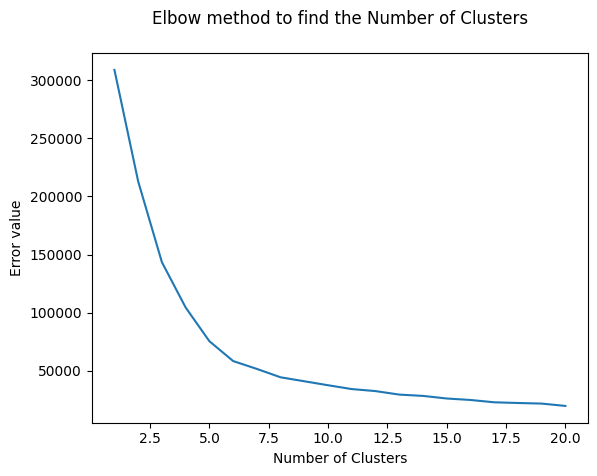

In [16]:
plt.plot(
    range(1, 21),
    error
)
plt.title('Elbow method to find the Number of Clusters\n')
plt.xlabel('Number of Clusters')
plt.ylabel('Error value')
plt.show()

* From the graph above, we can see that the ideal number of clusters would be 5.
* Graph has a bend at clusters = 5.
* This implies that we set n_clusters = 5.

In [17]:
kmeans_model = KMeans(
    n_clusters = 5,
    init = 'k-means++',
    random_state = 42
)

In [18]:
kmeans_model.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [19]:
predictions = kmeans_model.predict(df)
predictions

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

### Plotting all clusters

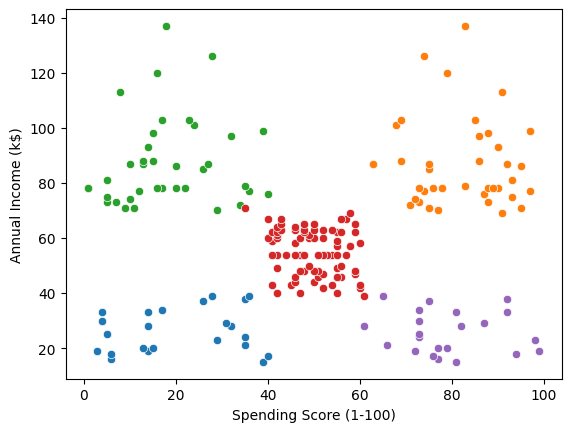

In [20]:
import numpy as np

clusters = list(np.unique(predictions))
centroids = np.array(kmeans_model.cluster_centers_)

for cluster_i in clusters:
    label = df[predictions == cluster_i]

    # plotting the results
    sns.scatterplot(
        data = label,
        x = label['Spending Score (1-100)'],
        y = label['Annual Income (k$)']
    )

plt.show()